In [1]:
import numpy as np

In [2]:
def read_input_pizza(filename):
    """Reads the input of a Pizza problem.

    returns:

    R: number of Rows of pizza grid
    C: number of Cols of pizza grid
    L: Lowest number of each ingredients per slice
    H: Highest number of cells per slice
    pizza: the pizza grid (1 == tomato, 0 == mushroom)
    """
    lines = open(filename).readlines()
    R, C, L, H = [int(val) for val in lines[0].split()]
    pizza = np.array([list(map(lambda item: 1 if item == 'T' else 0, row.strip())) for row in lines[1:]])
    return R, C, L, H, pizza

In [3]:
R, C, L, H, pizza = read_input_pizza('../data2018/c_medium.in')

In [4]:
R

200

In [5]:
pizza

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 1]])

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

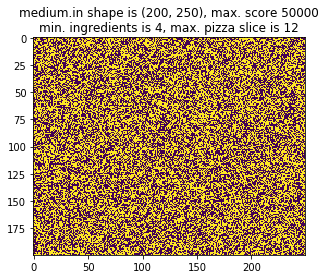

In [7]:
fig, ax = plt.subplots()
ax.imshow(pizza)
ax.set_title(f'medium.in shape is {pizza.shape}, max. score {pizza.size}\nmin. ingredients is {L}, max. pizza slice is {H}');

In [10]:
slices = []

while True:
    # randomly choose an available location for the start of the slice
    location = get_random_available_location(pizza)

    # select a random shape and try to fit it at the selected location
    slice_shape = get_random_shape(shapes)
    if satisfy_constraints(location, slice_shape, pizza):
        slices.append(slice(location, slice_shape))

        # since we sliced the pizza, we need to update the available cells 
        update_pizza(pizza, this_slice)            

    # should we exit while loop?
    if no_more_possible_slices() or iteration_limit_reached():
        break

NameError: name 'get_random_shape' is not defined

In [9]:
import tqdm
from random import randint

def get_random_available_location(slice_mask):
    """Returns a randomly selected empty location on the slice mask."""
    nonzero_elements = np.nonzero(1 - slice_mask)
    n = len(nonzero_elements[0])
    index = randint(0, n - 1)
    return nonzero_elements[0][index], nonzero_elements[1][index]

def satisfy_constraints(location, shape, slice_mask, pizza, L, H):
    """Validates whether the given location and slice shape can be applied to the pizza."""
    r, c = location
    dr, dc = shape
    if slice_mask[r:r+dr, c:c+dc].size == dr * dc:  # outside pizza boundary
        if np.all(slice_mask[r:r+dr, c:c+dc] == 0): # pizza still available
            if dr * dc <= H:
                tomatoes = np.sum(pizza[r:r+dr, c:c+dc])
                mushrooms = dr * dc - tomatoes
                if tomatoes >= L and mushrooms >= L:
                    return True
    return False

def cut_slice(location, shape, current_slices, slice_mask):
    """Adds a given slice defined by location and shape to existing slices and
    updates the slice mask."""
    r, c = location
    dr, dc = shape
    slice_mask[r:r + dr, c:c + dc] = 1
    current_slices.append((r, c, dr, dc))

def score(pizza_slices):
    """Computes score of given pizza_slices list."""
    s = 0
    for pizza_slice in pizza_slices:
        s += pizza_slice[2] * pizza_slice[3]
    return s

def write_output_pizza(filename, pizza_slices):
    """Writes an output file with the required format."""
    with open(filename, 'w') as f:
        f.write(f"{len(pizza_slices)}\n")
        for slice in pizza_slices:
            r, c, dr, dc = slice
            f.write(f"{r} {c} {r+dr-1} {c+dc-1}\n")

def greedy1(fname):
    """Greedy approach to the pizza slice problem.
    We try one random shape at one random point each turn."""
    R, C, L, H, pizza = read_input_pizza(fname)
    possible_shapes = [(4, 2), (2, 4), (3, 3), (5, 2), (2, 5), (11, 1), (1,11), (2, 6), (6, 2), (3, 4), (4, 3)]
    slice_mask = np.zeros_like(pizza) # stores the sliced cells as 1 for easy lookup
    pizza_slices = [] # stores the slices we made
    for _ in tqdm.tqdm(range(20000)):
        location = get_random_available_location(slice_mask)
        shape = possible_shapes[randint(0, len(possible_shapes) - 1)]
        if satisfy_constraints(location, shape, slice_mask, pizza, L, H):
            cut_slice(location, shape, pizza_slices, slice_mask)
    print('\n')
    print(f"score: {score(pizza_slices)}")
    write_output_pizza(fname.split('.in')[0]+'.out', pizza_slices)

In [52]:
slice_mask[300:303,400:403]

array([], shape=(0, 0), dtype=int64)

In [47]:
1- slice_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [45]:
np.nonzero(1 - slice_mask)

array([  0,   0,   0, ..., 199, 199, 199])

In [41]:
get_random_available_location(slice_mask)

(193, 181)

In [11]:
greedy1('../data2018/c_medium.in')

100%|██████████| 20000/20000 [00:10<00:00, 1954.79it/s]



score: 28558


In [12]:
fig, ax 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a9663c8>)

In [13]:
def show_output(fname):
    """Reads an output file, assuming it's valid and plots the result."""
    input_fname = fname.split('.out')[0] + '.in'
    R, C, L, H, pizza = read_input_pizza(input_fname)
    lines = open(fname).readlines()
    N = int(lines[0].strip())
    slice_mask = np.zeros_like(pizza)
    pizza_slices = []
    for i in range(1, N+1):
        r, c, dr, dc = [int(val) for val in lines[i].strip().split()]
        dr += 1 - r
        dc += 1 - c 
        slice_mask[r:r + dr, c:c + dc] = i
        pizza_slices.append([r, c, dr, dc])
    
    fig, axes = plt.subplots(figsize=(9, 4), ncols=2, sharex=True, sharey=True)
    axes[0].imshow(slice_mask)
    axes[0].set_title(f'coloring by slice number (1 to {slice_mask.max()})')

    axes[1].imshow((slice_mask > 0).astype(np.int))
    axes[1].set_title('coloring by empty (green) / occupied (yellow)')

    plt.suptitle(f'solution score: {score(pizza_slices)}')
    plt.tight_layout(rect=[0, 0, 1, .95])
    
    axes[1].axis((-.5, C-.5, R-.5, -.5))
    

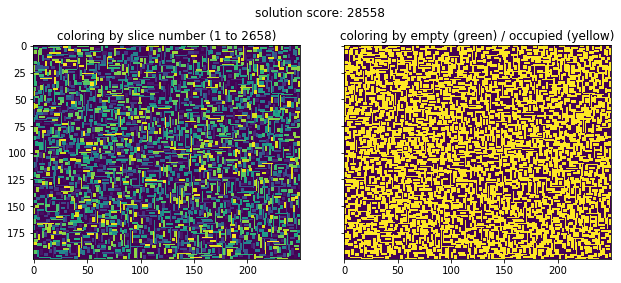

In [14]:
show_output('../data2018/c_medium.out')

In [26]:
%load_ext line_profiler

In [28]:
r = %lprun -r -f greedy1 greedy1('../data2018/c_medium.in')
r.print_stats()

100%|██████████| 20000/20000 [00:10<00:00, 1858.03it/s]




score: 28776
Timer unit: 1e-06 s

Total time: 10.7316 s
File: <ipython-input-19-c5e117432a6e>
Function: greedy1 at line 47

Line #      Hits         Time  Per Hit   % Time  Line Contents
    47                                           def greedy1(fname):
    48                                               """Greedy approach to the pizza slice problem.
    49                                               We try one random shape at one random point each turn."""
    50         1      18388.0  18388.0      0.2      R, C, L, H, pizza = read_input_pizza(fname)
    51         1          3.0      3.0      0.0      possible_shapes = [(4, 2), (2, 4), (3, 3), (5, 2), (2, 5), (11, 1), (1,11), (2, 6), (6, 2), (3, 4), (4, 3)]
    52         1         57.0     57.0      0.0      slice_mask = np.zeros_like(pizza) # stores the sliced cells as 1 for easy lookup
    53         1          1.0      1.0      0.0      pizza_slices = [] # stores the slices we made
    54     20001     151040.0      7.6  

In [29]:
import sympy
from random import shuffle

def generate_all_shapes(L, H):
    """Generates all possible tuples that satisfy the problem's shape constraints."""
    possible_shapes = []
    for size in range(2*L, H+1):
        factors = sympy.factorint(size)
        if len(factors) == 1:
            prime = list(factors.keys())[0]
            max_exp = list(factors.values())[0]
            for exp in range(0, max_exp+1):
                factor1 = prime ** exp
                factor2 = prime ** (max_exp - exp)
                possible_shapes.append((factor1, factor2))
        elif len(factors) == 2:
            prime1, prime2 = list(factors.keys())
            max_exp1, max_exp2 = list(factors.values())
            for exp1 in range(0, max_exp1+1):
                for exp2 in range(0, max_exp2+1):
                    factor1 = prime1 ** (max_exp1 - exp1) * prime2 ** (max_exp2 - exp2)
                    factor2 = prime1 ** (exp1) * prime2 ** (exp2)
                    possible_shapes.append((factor1, factor2))
        else:
            raise NotImplementedError
    return possible_shapes

def get_random_available_location_set2(random_locations, empty_cells):
    """Selects a random location that is still in empty_cells."""
    while len(random_locations) > 0:
        candidate = random_locations.pop()
        if candidate in empty_cells:
            return candidate
    else:
        return None

def update_empty_cells(location, shape, empty_cells):
    """Updates the empty cell dictionary."""
    r, c = location
    dr, dc = shape
    for rr in range(r, r+dr):
        for cc in range(c, c+dc):
            empty_cells.discard((rr, cc))
    
def greedy5(fname, iters=30000):
    """Greedy approach to pizza slicing.
    Fifth iteration: randomize the locations in which we try to add stuff."""
    R, C, L, H, pizza = read_input_pizza(fname)
    possible_shapes = generate_all_shapes(L, H)
    slice_mask = np.zeros_like(pizza)  # stores the sliced cells as 1 for easy lookup
    pizza_slices = []  # stores the slices we made
    empty_cells = set(tuple(args) for args in np.transpose(np.nonzero(1-slice_mask)).tolist())
    random_locations = list(x for x in empty_cells)
    shuffle(random_locations)
    current_score = 0
    for _ in tqdm.tqdm(range(iters)):
        location = get_random_available_location_set2(random_locations, empty_cells)
        if location is None:
            break
        selected_shapes = []
        for shape in possible_shapes:
            if satisfy_constraints(location, shape, slice_mask, pizza, L, H):
                selected_shapes.append(shape)
        if len(selected_shapes) > 0:
            current_score = score(pizza_slices)
            shape = max(selected_shapes, key=lambda shp: current_score + shp[0]*shp[1])
            cut_slice(location, shape, pizza_slices, slice_mask)
            update_empty_cells(location, shape, empty_cells)
    print('\n')
    print(f"score: {score(pizza_slices)}")
    write_output_pizza(fname.split('.')[0] + '.out', pizza_slices)

In [31]:
greedy5('../data2018/c_medium.in')

 51%|█████     | 15304/30000 [00:02<00:01, 7982.81it/s]



score: 39915


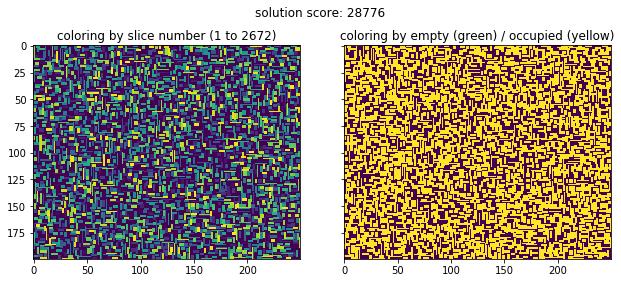

In [32]:
show_output('../data2018/c_medium.out')

In [33]:
r = %lprun -r -f greedy5 greedy5('../data2018/c_medium.in')
r.print_stats()

 53%|█████▎    | 16030/30000 [00:06<00:03, 3775.21it/s]



score: 39603
Timer unit: 1e-06 s

Total time: 5.70577 s
File: <ipython-input-29-6596edaa9978>
Function: greedy5 at line 45

Line #      Hits         Time  Per Hit   % Time  Line Contents
    45                                           def greedy5(fname, iters=30000):
    46                                               """Greedy approach to pizza slicing.
    47                                               Fifth iteration: randomize the locations in which we try to add stuff."""
    48         1      17706.0  17706.0      0.3      R, C, L, H, pizza = read_input_pizza(fname)
    49         1        232.0    232.0      0.0      possible_shapes = generate_all_shapes(L, H)
    50         1         86.0     86.0      0.0      slice_mask = np.zeros_like(pizza)  # stores the sliced cells as 1 for easy lookup
    51         1          3.0      3.0      0.0      pizza_slices = []  # stores the slices we made
    52         1      70850.0  70850.0      1.2      empty_cells = set(tuple(args) 